### Query
5.1For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
os.chdir('D:\downloads')
shares=pd.read_csv('MindTree.csv')
shares['Day_Perc_Change']=(shares['Close Price'].pct_change()*100)
shares


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,NaN
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,0.363137
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,-0.968120
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,-2.656265
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,0.933252
5,MINDTREE,EQ,22-May-2017,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,0.974874
6,MINDTREE,EQ,23-May-2017,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,-0.238877
7,MINDTREE,EQ,24-May-2017,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,1.755961
8,MINDTREE,EQ,25-May-2017,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,6.657515
9,MINDTREE,EQ,26-May-2017,543.90,540.00,544.00,532.00,533.45,535.20,537.15,461613,2.479538e+08,12606,113087,24.50,-1.599559


In [5]:
mean_return=shares['Day_Perc_Change'].mean()
daily_stdev=shares['Day_Perc_Change'].std()
mean_return
daily_stdev

2.151154178820467

In [6]:
annual_mean=mean_return*252
annual_stdev=daily_stdev*np.sqrt(252)
sharpe=annual_mean/annual_stdev
sharpe

1.1495954840487488

Text(0, 0.5, 'Returns')

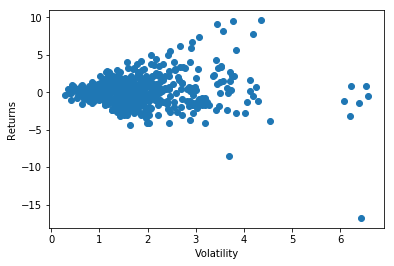

In [7]:
a=shares['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
y=shares['Day_Perc_Change']
x=volatility
plt.scatter(x,y)
plt.xlabel('Volatility')
plt.ylabel('Returns')

### Query 5.2 
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

Text(0, 0.5, 'Returns')

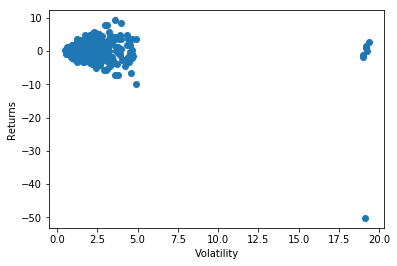

In [8]:
share1=pd.read_csv('JUBLFOOD.csv')
share1['Day_Perc_Change']=(share1['Close Price'].pct_change()*100)
mean_return=share1['Day_Perc_Change'].mean()
daily_stdev=share1['Day_Perc_Change'].std()
annual_mean1=mean_return*252
annual_stdev1=daily_stdev*np.sqrt(252)
a=share1['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
y=share1['Day_Perc_Change']
x=volatility
plt.scatter(x,y)
plt.xlabel('Volatility')
plt.ylabel('Returns')

Text(0, 0.5, 'Returns')

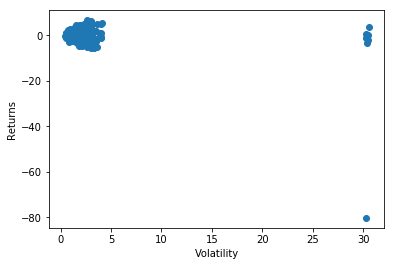

In [9]:
share2=pd.read_csv('IGL.csv')
share2['Day_Perc_Change']=(share2['Close Price'].pct_change()*100)
mean_return=share2['Day_Perc_Change'].mean()
daily_stdev=share2['Day_Perc_Change'].std()
annual_mean2=mean_return*252
annual_stdev2=daily_stdev*np.sqrt(252)
a=share2['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
y=share2['Day_Perc_Change']
x=volatility
plt.scatter(x,y)
plt.xlabel('Volatility')
plt.ylabel('Returns')

Text(0, 0.5, 'Returns')

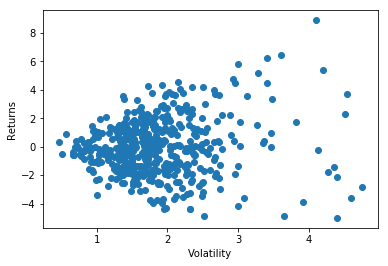

In [10]:
share3=pd.read_csv('APOLLOTYRE.csv')
share3['Day_Perc_Change']=(share3['Close Price'].pct_change()*100)
mean_return=share3['Day_Perc_Change'].mean()
daily_stdev=share3['Day_Perc_Change'].std()
annual_mean3=mean_return*252
annual_stdev3=daily_stdev*np.sqrt(252)
a=share3['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
y=share3['Day_Perc_Change']
x=volatility
plt.scatter(x,y)
plt.xlabel('Volatility')
plt.ylabel('Returns')

Text(0, 0.5, 'Returns')

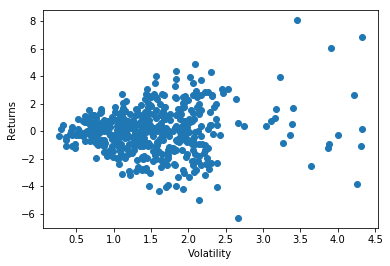

In [11]:
share4=pd.read_csv('GODREJIND.csv')
share4['Day_Perc_Change']=(share4['Close Price'].pct_change()*100)
mean_return=share4['Day_Perc_Change'].mean()
daily_stdev=share4['Day_Perc_Change'].std()
annual_mean4=mean_return*252
annual_stdev4=daily_stdev*np.sqrt(252)
a=share4['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
y=share4['Day_Perc_Change']
x=volatility
plt.scatter(x,y)
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [12]:
df1=shares.iloc[1:493,15]
df2=share1.iloc[1:493,15]
df3=share2.iloc[1:493,15]
df4=share3.iloc[1:493,15]
df5=share4.iloc[1:493,15]

In [13]:
df=pd.DataFrame([df1,df2,df3,df4,df5])
stocks=df.T

In [14]:
stocks

,Day_Perc_Change,Day_Perc_Change,Day_Perc_Change,Day_Perc_Change,Day_Perc_Change
1,0.363137,2.457458,0.554861,1.078051,1.080287
2,-0.968120,-0.152287,1.322330,1.258532,0.649795
3,-2.656265,-2.831133,-1.623982,-1.980198,-2.378525
4,0.933252,-0.122627,-0.239390,0.859660,0.591716
5,0.974874,1.198311,-1.294806,-0.383550,-2.084775
6,-0.238877,-3.605746,-0.582455,-1.390374,-0.821627
7,1.755961,-1.681518,0.122268,-3.926247,1.541065
8,6.657515,3.942854,0.183178,2.461052,2.447583
9,-1.599559,-2.192226,4.225710,2.291758,1.644117
10,-0.868834,-5.273497,0.000000,-2.778975,-1.390059


In [15]:
mean_daily_return=stocks.mean()
cov_matrix=stocks.cov()
mean_daily_return

Day_Perc_Change    0.155317
Day_Perc_Change    0.107061
Day_Perc_Change   -0.053840
Day_Perc_Change   -0.020513
Day_Perc_Change   -0.027799
dtype: float64

### Query 5.3 
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

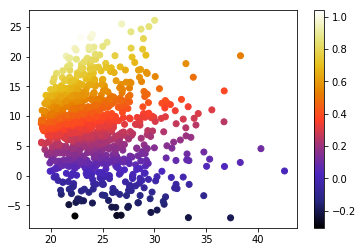

In [157]:
num_iters=1000
ret=np.zeros((3,num_iters))
for i in range(num_iters):
    weights=np.random.random(5)
    weights/=np.sum(weights)
    portfolio_return=np.dot(mean_daily_return,weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))*np.sqrt(252)
     
    ret[0,i]=portfolio_return
    ret[1,i]=portfolio_volatility
    ret[2,i]=portfolio_return/portfolio_volatility

results_frame=pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='CMRmap')
plt.colorbar()

### Query 5.4 
Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

In [158]:
a=results_frame['sharpe'].max()
for i in range(0,493):
    if(a==results_frame['sharpe'].iloc[i]):
        print('Sharpe max and volatility min index:',i)

Sharpe max and volatility min index: 478
